In [ ]:
import pandas as pd
import model_selection_pipeline as pipeline
from joblib import dump
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, QuantileDMatrix, Booster, train
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import GridSearchCV
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

Class=0, n=70 (32.710%)
Class=1, n=76 (35.514%)
Class=2, n=17 (7.944%)
Class=3, n=13 (6.075%)
Class=4, n=9 (4.206%)
Class=5, n=29 (13.551%)


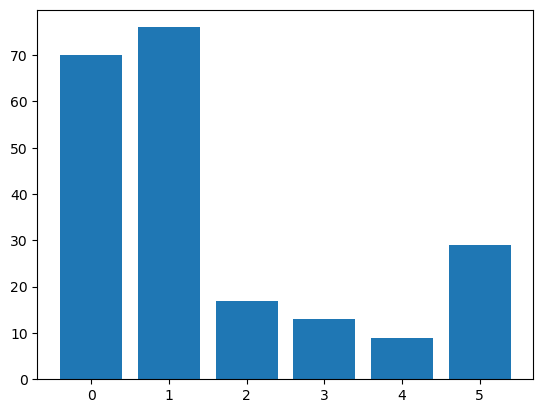

In [ ]:
# # load and summarize the dataset
# from pandas import read_csv
# from collections import Counter
# from matplotlib import pyplot
# from sklearn.preprocessing import LabelEncoder
# # define the dataset location
# url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/glass.csv'
# # load the csv file as a data frame
# df = read_csv(url, header=None)
# data = df.values
# # split into input and output elements
# X, y = data[:, :-1], data[:, -1]
# # label encode the target variable
# y = LabelEncoder().fit_transform(y)
# # summarize distribution
# counter = Counter(y)
# for k,v in counter.items():
# 	per = v / len(y) * 100
# 	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# # plot the distribution
# pyplot.bar(counter.keys(), counter.values())
# pyplot.show()

In [ ]:
# strategy_1 = {0:100, 1:100, 2:200, 3:200, 4:200, 5:200}
# oversample = SMOTE(sampling_strategy=strategy_1)
# X_new, y_new = oversample.fit_resample(X, y)

In [ ]:
# Counter(y_new)

Counter({2: 200, 3: 200, 4: 200, 5: 200, 0: 100, 1: 100})

<h1>Implementing SMOTE on the Cleaned Dataset

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
feature_list = ['Num_of_Delayed_Payment', 'Num_Bank_Accounts', 'Interest_Rate','Delay_from_due_date','Changed_Credit_Limit','Outstanding_Debt','Credit_History_Age', 'Credit_Score']

In [ ]:
subset_df = df[feature_list]

subset_df['Credit_Score'] = subset_df['Credit_Score'].map({'Good': 0, 'Poor': 1, 'Standard': 2})

X = subset_df[feature_list[:-1]].values
y = subset_df[["Credit_Score"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y, test_size = 0.3)

C:\Users\areng\AppData\Local\Temp\ipykernel_13320\3279624015.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['Credit_Score'] = subset_df['Credit_Score'].map({'Good': 0, 'Poor': 1, 'Standard': 2})


In [ ]:
dict(Counter(y_train["Credit_Score"]))

{2: 37222, 1: 20299, 0: 12479}

In [ ]:
# strategy = {0: 27000, 1: 27000}
# sampler = SMOTE(sampling_strategy=strategy)

# X_train_new, y_train_new = sampler.fit_resample(X_train, y_train)

In [ ]:
over_sample_strategy = SMOTE(sampling_strategy={0: 16000})
under_sample_strategy = RandomUnderSampler(sampling_strategy={1: 20000, 2: 26000})

steps = [('o', over_sample_strategy), ('u', under_sample_strategy)]
pipeline = Pipeline(steps=steps)

X_train_new, y_train_new = pipeline.fit_resample(X_train, y_train)

In [ ]:
y_train_new["Credit_Score"].value_counts()

Credit_Score
2    26000
1    20000
0    16000
Name: count, dtype: int64

In [ ]:
params = {
 'base_score': 0.5,
 'colsample_bylevel': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 1e-1,
 'max_delta_step': 1,
 'max_depth': 10,
 'min_child_weight': 1,
 'n_estimators': 232,
 'objective': 'binary:logistic',
 'reg_alpha': 9e-1,
 'reg_lambda': 0.8,
 'scale_pos_weight': 1,
 'seed': 21,
 'silent': 1,
 'subsample': 1,
}
# XGBClassifier().get_xgb_params()

In [ ]:
over_sampled_model = XGBClassifier(**params)
over_sampled_model.fit(X_train, y_train)

c:\Users\areng\.conda\envs\NLP\Lib\site-packages\xgboost\core.py:160: UserWarning: [20:31:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "scale_pos_weight", "silent" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=0.5, booster=None, callbacks=None, colsample_bylevel=1,
              colsample_bynode=None, colsample_bytree=1, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=1, max_depth=10,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=232,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred= over_sampled_model.predict(X_test)

In [ ]:
scores = {
    "F1:": "{:.4f}".format(f1_score(y_test, y_pred, average='weighted')),
    "Precision:": "{:.4f}".format(precision_score(y_test, y_pred, average='weighted')),
    "Recall:": "{:.4f}".format(recall_score(y_test, y_pred, average='weighted')),
    "Accuracy:": "{:.4f}".format(accuracy_score(y_test, y_pred))
}
print(scores)

{'F1:': '0.7803', 'Precision:': '0.7802', 'Recall:': '0.7807', 'Accuracy:': '0.7807'}
